# Structure of the Trie class
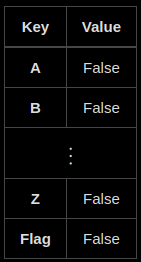
- Whenever we make the value of any key TRUE, we create a dummy Trie for that key.
- In case the value of the FLAG key is TRUE, we can say that we have reached the end of the Trie.
# Inserting a word (APPLE)
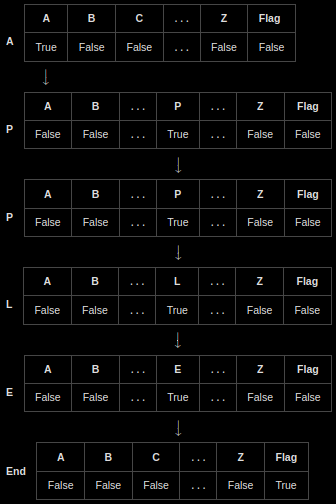
# Inserting anoher word (APPS)
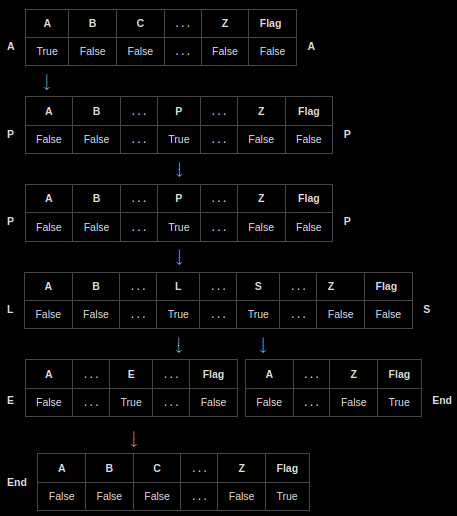
# Trie class implementation

In [22]:
class Trie:
    def __init__(self):
        self.alphabets = [False] * 27
        self.count = 0 # stores the number of alphabets set to TRUE
        self.indexTries = {}

    def _get_flag(self):
        return self.alphabets[26]

    def _set_flag(self, val):
        self.alphabets[26] = val

    def _is_key_present(self, alphabet):
        return self.alphabets[ord(alphabet) - ord('a')]

    def _set_key(self, alphabet):
        idx = ord(alphabet) - ord('a')
        if self.alphabets[idx]:
            return
        self.count += 1
        self.alphabets[idx] = True

    def insert(self, word):
        currentTrie = self
        for c in word:
            if not currentTrie._is_key_present(c):
                currentTrie._set_key(c)
                currentTrie.indexTries[c] = Trie()
            currentTrie = currentTrie.indexTries[c]
        if ' ' not in currentTrie.indexTries:
            currentTrie.indexTries[' '] = Trie()
            currentTrie = currentTrie.indexTries[' ']
            currentTrie._set_flag(True)

    def longestPrefix(self):
        currentTrie = self
        sb = []
        while currentTrie.count == 1:
            key = next(iter(currentTrie.indexTries))
            sb.append(key)
            currentTrie = currentTrie.indexTries[key]
        return ''.join(sb).strip()

    def search(self, word):
        currentTrie = self
        for c in word:
            if not currentTrie._is_key_present(c):
                return False
            currentTrie = currentTrie.indexTries.get(c)
        currentTrie = currentTrie.indexTries.get(' ')
        if currentTrie is None:
            return False
        else:
            return currentTrie._get_flag()

    def startsWith(self, prefix):
        currentTrie = self
        for c in prefix:
            if not currentTrie._is_key_present(c):
                return False
            currentTrie = currentTrie.indexTries.get(c)
        return True

# Running test cases

In [20]:
trie = Trie()

if __name__ == "__main__":
    results = [None, True, False, True, None, True]
    values = ["apple", "apple", "app", "app", "app", "app"]
    queries = ["insert", "search", "search", "startsWith", "insert", "search"]

    assert len(values) == len(queries)
    assert len(values) == len(results)

    for i in range(len(values)):
        value, query = values[i], queries[i]
        answer = None
        if query == "insert":
            trie.insert(value)
        if query == "search":
            answer = trie.search(value)
        if query == "startsWith":
            answer = trie.startsWith(value)
        try:
            assert answer == results[i]
        except AssertionError:
            print(f"Assertion falied for {i}-th iteration")

    print("All test cases passed")

All test cases passed


# Extracing longest common Prefix

In [18]:
trie = Trie()

if __name__ == "__main__":
    words = ["flower","flow","floral","flour"]
    for word in words:
        trie.insert(word)
    print(f"Common prefix: {trie.longestPrefix()}")

Common prefix: flo


***